# 2: Corpora

* Some (circularly defined) terminology
* Corpora in NLTK
* NLTK corpus readers
* Annotations
* Other corpora and annotations
* Which corpus?

## Some (circularly defined) terminology

* Corpus: a collection of documents
* Document (D): a sequence of word tokens
* Token: a particular instance of a type in a document
* Type: a distinct word form, often appearing in multiple tokens across documents, corpora
* Lexicon: a collection of word types, possibly with associated information
* Vocabulary (V): a list of all word types in a corpus
* *n*-grams: a fixed length sequence of words (unigram, bigram, trigram, 4-gram,...). $n$-grams also have type/token distinction

Let's use some of this terminology to talk about the language of Hodor from Game of Thrones (pic from HBO via psychologytoday)
![](https://cdn.psychologytoday.com/sites/default/files/styles/image-article_inline_full_caption/public/field_blog_entry_images/0403.sdt-github.png?itok=XRoIbrhx)

Let's look at tokens, types, and vocabulary in the first "big" corpus ever: the Brown corpus

In [1]:
import nltk
# nltk.download("brown")
from nltk.corpus import brown

In [2]:
len(brown.words())

1161192

In [3]:
brown.words()[:30]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'The',
 'jury',
 'further',
 'said',
 'in']

In [4]:
types = set(brown.words())
len(types)

56057

In [5]:
list(types)[:30]

['1657',
 'radiance',
 'Movable',
 '/',
 '62-year-old',
 'caving',
 'half-off',
 'outboards',
 'Speedy',
 'daybreak',
 'naturalistic',
 'registrants',
 'substitute',
 'Danny',
 'vertebral',
 '2500',
 "Institute's",
 'diameter',
 'coarsened',
 'Walt',
 'imbruing',
 'machinist',
 'L',
 'Brinsley',
 'railroader',
 "conference's",
 'Tuesday',
 'chouise',
 'ceremoniously',
 'billows']

An important statistical property shared by all natural language corpora: Most of the tokens come from a small set of common types, and most of the vocabulary consists of rare types.


In [6]:
import pylab
from collections import Counter

counts = Counter(word.lower() for word in brown.words())

def print_zipf(loglog=False,top_n=100000):
    ranks = range(1, min(len(counts) +1, top_n + 1))
    frequencies = sorted(counts.values(),reverse=True)[:top_n]
    if loglog:
        pylab.loglog(ranks, frequencies, marker=".")
        pylab.title("Zipf plot for Brown corpus word types (log-log)")
    else:
        pylab.plot(ranks, frequencies, marker=".")
        pylab.title("Zipf plot for Brown corpus word types")

    pylab.xlabel("Frequency rank of word type")
    pylab.ylabel("Absolute frequency of word type")
    pylab.show()
    

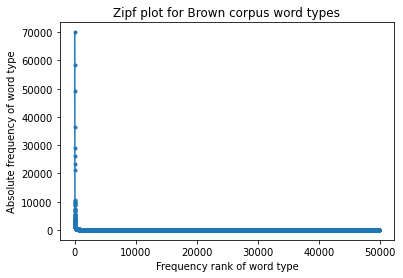

In [7]:
print_zipf()

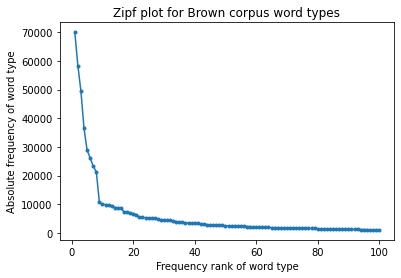

In [8]:
print_zipf(top_n=100)

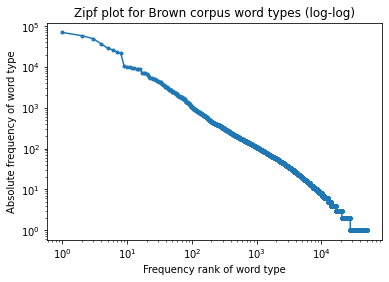

In [9]:
print_zipf(loglog=True)

If a log-log plot of word rank against frequency is roughly linear, this means it is obeying [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). The simple formulation of this law is that the frequency of a word (type) in a corpus will be inversely proportional to its frequency rank. The law was first noticed with respect to the Brown corpus, but it holds for much larger corpora in many different languages, for example Wikipedias:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Zipf_30wiki_en_labels.png/1024px-Zipf_30wiki_en_labels.png" alt="drawing" width="400"/>

(from the Wikipedia entry, by SergioJimenez, numbers are millions)

One upshot of *Zipf's law* is that most words have very low frequency. Let's count the number of word types that only appear once in the Brown (These types are known as *hapax legomena*).

In [10]:
hapax_count = 0
for word in counts.values():
    if word == 1:
        hapax_count += 1
hapax_count

22010

This basic fact about words and corpora has wide-ranging implications that will motivate many of the approaches to computational linguistics we talk about throughout this program!

## Corpora in NLTK

The Natural Language Toolkit or NLTK is a venerable Python package for doing computational linguistics. Though no longer a source for cutting-edge NLP tools, it is designed for learning CL concepts and we will use it in various ways during this program. One way it will be most useful to us as is an easy source of a (relatively) diverse set of publicly-available corpora.

Corpora in NLTK need to be downloaded using the `download()` method

In [11]:
# import nltk
# nltk.download()

The cell below will download all the corpus mentioned in this repo. You can also just download everything with `nltk.download("all")` though this will take a while and use a fair bit of hard disk space!

In [12]:
import nltk
# for corpus in ["movie_reviews", "treebank", "brown", "gutenberg", "switchboard", "sinica_treebank", "udhr2", "knbc", "reuters", "indian", "europarl_raw", "cess_esp", "alpino", "twitter_samples", "floresta", "webtext", "nps_chat", "stopwords", "punkt","universal_tagset"]:
#     nltk.download(corpus)

Let's take a quick tour of some of the corpora available via NLTK. We are not listing all the corpora here, but the major ways corpora can vary are

* source
* size
* genre
* time period
* annotations

One of the most popular ways to look at the contents of a corpus is a word cloud, so in addition to some basic information we are going to show one for each corpus. In a word cloud, the size of a word reflects its frequency.

In [13]:
# Install wordcloud by uncommenting the next line
# !pip install wordcloud

Here's a function that's going to give us basic info about each corpus. Note that there's a special "corpus" of common English words like ("the", "of", etc.) called _stopwords_, and we will filter these out to get a better sense of what each corpus is about.

In [14]:
from nltk.corpus import movie_reviews, treebank, brown, gutenberg, switchboard, sinica_treebank, udhr2, genesis, knbc, reuters, indian, europarl_raw, cess_esp, alpino, twitter_samples, floresta, webtext, nps_chat, stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords_set = stopwords.words("English")
stopwords_set.extend(["would", "could", "one", "may"])

def corpus_info(corpus):
    counter = Counter(word.lower() for word in corpus.words())
    print("Total tokens:", sum(list(counter.values())))
    print("Vocabulary size:", len(counter))
    print("Number of documents:", len(corpus.fileids()))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(10)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))
    print("Wordcloud:")
    wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(corpus.words()))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


### [The Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)

* The original corpus linguistics corpus (Kučera and Francis 1967)
* First major machine-readable corpus
* 500 documents
* "Balanced" corpus of 15 text genres, used in studies of genre
* Huge at the time, now a bit small!



Total tokens: 1161192
Vocabulary size: 49815
Number of documents: 500
Most common words: the , . of and to a in that is
Most common words excluding stopwords: said new time two first like man even made also
Wordcloud:


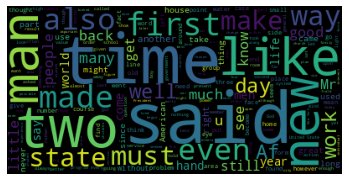

In [15]:
corpus_info(brown)

### [The Penn Treebank](https://catalog.ldc.upenn.edu/LDC99T42)

* Primarily Wall Street Journal articles from 1989
* 2500 documents in total
* Only a ~200 document sample in NLTK, full version requires LDC subscription
* The first large corpus with parse trees, used extensively for parsing and syntactic analysis


Total tokens: 100676
Vocabulary size: 11387
Number of documents: 199
Most common words: , the . of to a in and *-1 0
Most common words excluding stopwords: said million new company says year market stock trading also
Wordcloud:


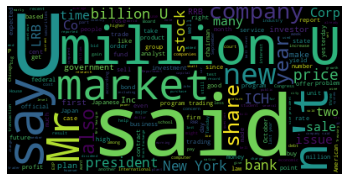

In [16]:
corpus_info(treebank)

### [Switchboard corpus](https://catalog.ldc.upenn.edu/LDC97S62)

* 36 transcriped telephone conversations
* Calls between strangers in 1990-1
* Useful for study of dialogue acts


Total tokens: 82792
Vocabulary size: 4376
Number of documents: 1
Most common words: , . i and the you that it a to
Most common words excluding stopwords: uh know yeah like well think right um oh really
Wordcloud:


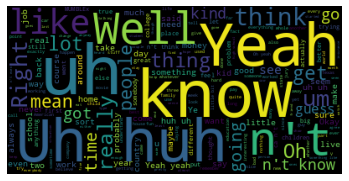

In [17]:
corpus_info(switchboard)

### Gutenberg

* Out of copyright documents from [Project Gutenberg](https://www.gutenberg.org/)
* Mostly classic literature from before 1900
* NLTK just has a small sample, but tens of thousands available

Total tokens: 2621613
Vocabulary size: 42339
Number of documents: 18
Most common words: , the and . of to : a in i
Most common words excluding stopwords: shall said unto lord thou man thy god thee ye
Wordcloud:


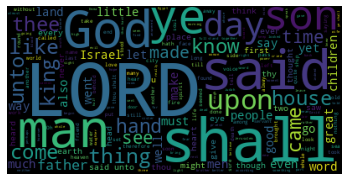

In [18]:
corpus_info(gutenberg)

### Internet-derived copora

* 2000 movie reviews from a IMDB newsgroup (movie_reviews)
* 10K IM chat posts (nps_chat)
* Collection of various text from the web (webtext)
* Sample of tweets (twitter_samples)

Total tokens: 1583820
Vocabulary size: 39768
Number of documents: 2000
Most common words: , the . a and of to ' is in
Most common words excluding stopwords: film movie like even good time story much character also
Wordcloud:


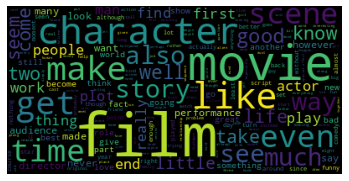

In [19]:
corpus_info(movie_reviews)

### Non-English Corpora

* Balanced corpus of Chinese (sinica_treebank)
* Japanese blogs (knbc)
* Samples from various Indian languages (indian)
* News articles from Spanish languages (cess_esp,cess_cat)
* Portuguese (floresta)
* Dutch (alpino)
* Europearn parliment proceedings (europarl_raw)
* Universal declaration of human rights in 300+ languages

Total tokens: 91627
Vocabulary size: 17273
Number of documents: 1
Most common words: 的 、 在 是 了 有 我 他 就 上
Most common words excluding stopwords: 的 在 是 了 有 我 他 就 上 和
Wordcloud:


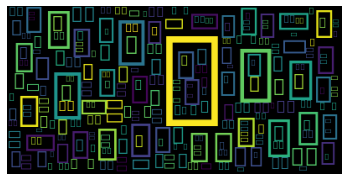

In [20]:
corpus_info(sinica_treebank)

## NLTK corpus readers


Most of the corpora in NLTK have *corpus readers* (code which converts raw text files to Python data structures) which conform to a single unified standard.

The simpliest way to access a corpus is by iterating over the tokens using the `words()` method. Each word is a string.

In [21]:
movie_reviews.words()[:50]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.',
 'they',
 'get',
 'into',
 'an',
 'accident',
 '.',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 ',',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 ',',
 'and',
 'has',
 'nightmares',
 '.',
 'what',
 "'",
 's',
 'the',
 'deal',
 '?',
 'watch']

Most corpora are divided into sentences, which for NLTK corpora can be accessed iteratively using `sents()` method. Sentences are a lists of words. Some corpora (like the Brown) also have paragraphs (`paras()`), which are lists of sentences.

In [22]:
brown.sents()[-1]

['From',
 'what',
 'I',
 'was',
 'able',
 'to',
 'gauge',
 'in',
 'a',
 'swift',
 ',',
 'greedy',
 'glance',
 ',',
 'the',
 'figure',
 'inside',
 'the',
 'coral-colored',
 'boucle',
 'dress',
 'was',
 'stupefying',
 '.']

Let's print out all the sentences in the Brown that contain some particular word, your choice (but nothing too common or too rare)!

In [23]:
for sent in brown.sents():
    if "linguistics" in sent:
        print(sent)

['This', 'basic', 'principle', ',', 'the', 'first', 'in', 'a', 'richly', 'knotted', 'bundle', ',', 'was', 'conveyed', 'to', 'me', 'by', 'Dr.', 'Henry', 'Lee', 'Smith', ',', 'Jr.', ',', 'at', 'the', 'University', 'of', 'Buffalo', ',', 'where', 'he', 'heads', 'the', "world's", 'first', 'department', 'of', 'anthropology', 'and', 'linguistics', '.']
['The', 'joint', 'investigations', 'of', 'linguistics', 'and', 'psychiatry', 'have', 'established', ',', 'in', 'point', 'of', 'fact', ',', 'that', 'no', 'matter', 'what', 'the', 'subject', 'of', 'conversation', 'is', 'or', 'what', 'words', 'are', 'involved', ',', 'it', 'is', 'impossible', 'for', 'people', 'to', 'talk', 'at', 'all', 'without', 'telling', 'over', 'and', 'over', 'again', 'what', 'sort', 'of', 'people', 'they', 'are', 'and', 'how', 'they', 'relate', 'to', 'the', 'rest', 'of', 'the', 'world', '.']
['Newest', 'to', 'this', 'high-powered', 'battery', 'are', 'the', 'experts', 'in', 'linguistics', 'who', 'have', 'carried', 'that', 'mini

For many applications, we want to be able to iterate over the documents. Using NLTK, this is a two step process: first, we to get a list of the files using the `fileids()` method. Then we call the appropriate method from those mentioned above with the fileid we want as the argument.

In [24]:
brown.fileids()[:5]

['ca01', 'ca02', 'ca03', 'ca04', 'ca05']

In [25]:
for filename in brown.fileids()[:5]:
    print(brown.words(filename)[:5])

['The', 'Fulton', 'County', 'Grand', 'Jury']
['Austin', ',', 'Texas', '--', 'Committee']
['Several', 'defendants', 'in', 'the', 'Summerdale']
['Oslo', 'The', 'most', 'positive', 'element']
['East', 'Providence', 'should', 'organize', 'its']


## Annotations

Nearly all the corpora in NLTK have some kind of annotation associated with them. One common annotation is some kind of label for documents in the corpus. In the Brown, for instance, the label is associated with the genre, and for the Movie Review corpus it is the polarity (positive or negative) of the review. A list of categories is available using the `categories()` method

In [26]:
print(brown.categories())
print(movie_reviews.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['neg', 'pos']


In [27]:
for fileid in brown.fileids()[:5]:
    print(fileid, " ", brown.categories(fileid))

ca01   ['news']
ca02   ['news']
ca03   ['news']
ca04   ['news']
ca05   ['news']


In order to get text from a particular category, you can use the `categories` keyword for `words()`/`sents()/...`.

In [28]:
for sent in brown.sents(categories="humor")[:5]:
    print(sent)

['It', 'was', 'among', 'these', 'that', 'Hinkle', 'identified', 'a', 'photograph', 'of', 'Barco', '!', '!']
['For', 'it', 'seems', 'that', 'Barco', ',', 'fancying', 'himself', 'a', "ladies'", 'man', '(', 'and', 'why', 'not', ',', 'after', 'seven', 'marriages', '?', '?']
[')', ',', 'had', 'listed', 'himself', 'for', 'Mormon', 'Beard', 'roles', 'at', 'the', 'instigation', 'of', 'his', 'fourth', 'murder', 'victim', 'who', 'had', 'said', ':', '``', 'With', 'your', 'beard', ',', 'dear', ',', 'you', 'ought', 'to', 'be', 'in', 'movies', "''", '!', '!']
['Mills', 'secured', "Barco's", 'photograph', 'from', 'the', 'gentleman', 'in', 'charge', ',', 'rushed', 'to', 'the', 'Hollywood', 'police', 'station', 'to', 'report', 'the', 'theft', ',', 'and', 'less', 'than', 'five', 'minutes', 'later', ',', 'detectives', 'with', 'his', 'picture', 'in', 'hand', 'were', 'on', 'the', 'trail', 'of', 'Cal', 'Barco', '.']
['On', 'their', 'way', ',', 'they', 'stopped', 'at', 'every', 'gas', 'station', 'along', 'th

If you want to iterate over documents, you can also get fileids for that category using the category as an argument to fileids, and then  use `words()`/`sents()`

In [29]:
for filename in brown.fileids("religion"):
    print(brown.words(filename))

['As', 'a', 'result', ',', 'although', 'we', 'still', ...]
['If', 'the', 'content', 'of', 'faith', 'is', 'to', ...]
['One', 'hundred', 'years', 'ago', 'there', 'existed', ...]
['The', 'death', 'of', 'a', 'man', 'is', 'unique', ',', ...]
['Furthermore', ',', 'as', 'an', 'encouragement', 'to', ...]
['I', 'have', ',', 'within', 'the', 'past', 'fifty', ...]
['``', 'The', 'Lord', 'is', 'my', 'light', 'and', 'my', ...]
['But', ',', 'again', ',', 'we', 'have', 'no', 'real', ...]
['Few', 'persons', 'who', 'join', 'the', 'Church', ...]
['Men', 'need', 'unity', 'and', 'they', 'need', 'God', ...]
['When', 'they', 'say', 'that', 'under', 'no', ...]
['Much', 'more', 'than', 'shelter', ',', 'housing', ...]
['If', 'we', 'look', 'about', 'the', 'world', 'today', ...]
['To', 'what', 'extent', 'and', 'in', 'what', 'ways', ...]
['Individuals', 'possessing', 'unusual', 'gifts', ...]
['Pope', 'Leo', '13', ',', 'on', 'the', '13th', 'day', ...]
['I', 'am', 'a', 'magazine', ';', ';', 'my', 'name', ...]


Or you can iterate through all the texts and look up the category for a particular fileid using `categories(fileid)`.

In [30]:
brown.categories("cp23")

['romance']

Another extremely common annotation is a part-of-speech (POS) tag. In NLTK, POS tags are accessed using by using `tagged_words()` and `tagged_sents()`. The difference between these methods and their non-tagged equivalent is the string corresponding to a word token is replaced with a (token,POS) *tuple*.

In [31]:
brown.tagged_sents()

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [32]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [33]:
for word, pos in brown.tagged_sents()[0][:5]:
    print(word)
    print(pos)

The
AT
Fulton
NP-TL
County
NN-TL
Grand
JJ-TL
Jury
NN-TL


> When iterating over tuples, you can extract the elements in the header of the `for` loop.

It is worth noting that there are various different POS tag sets, even for just English. In recent years there has been a push towards a universal set that works for all languages. We can get the universal tagset by using the `tagset='universal'` keyword argument.

In [34]:
brown.tagged_sents(tagset='universal')[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Refer to this website [universal tag set](https://universaldependencies.org/u/pos/) for tag meanings and more examples: these are _fundamental_ linguistic concepts that anyone who works with language should know!

The other main kind of annotation included in NLTK are parses, providing the syntactic structure of the sentences. For those corpora which have this kind of annotation, like the Penn Treebank, use the `parsed_sents()`.

In [35]:
# treebank.parsed_sents()[0].draw()
# This cell should generate in another window

## Other corpora and annotations

NLTK is just a small, easy to access sample of full range of corpora out there. Here are some others, ranging for well-known and very useful to more obscure but cool! We will use some of these (and many others) later in the program...

* The entirety of Wikipedia is [downloadable](https://en.wikipedia.org/wiki/Wikipedia:Database_download). It is popular as a raw source of language data for various languages and also has interesting annotations, for instance the page structure and the edit history! 
* The [Gigaword corpus](https://catalog.ldc.upenn.edu/LDC2012T21) is a huge newspaper corpus with lots of useful annotation, though it requires an LDC subscription
* [The British National Corpus](http://www.natcorp.ox.ac.uk/) and [American National Corpus](http://www.anc.org/) are (like the Brown) balanced corpora reflecting a diversity of language genres and modalities in their respective countries, but at a much larger scale than the Brown.
* There are lots of big corpora of online reviews, e.g. [Amazon reviews](https://snap.stanford.edu/data/web-Amazon.html)
* Questions and answers from [Yahoo answers](https://webscope.sandbox.yahoo.com/catalog.php?datatype=l&guccounter=1)
* Large corpus of [Reddit comments](https://www.kaggle.com/reddit/reddit-comments-may-2015)
* Corpus of [blogger.com blogs](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) with user ids and background (gender/age)
* The [Cambridge Learner Corpus](https://ilexir.co.uk/datasets/index.html) written by non-native learners of English, with error annotations
* The [Enron e-mail corpus](https://aws.amazon.com/de/datasets/enron-email-data/), over a million internal e-mails of a now defunct company, used for studies of power relationships
* The [Hansards](https://www.isi.edu/natural-language/download/hansard/), proceedings of Canadian parliment, English-French parallel text used for machine translation
* The [Cornell Movie Dialogue Corpus](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html), scripts from 617 movies with character annotations
* [Jeopardy](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/) questions and answers
* ...



## Which corpus?

The sentences below are taken randomly from NLTK corpora mentioned above. Can you guess which corpus? More importantly, how do you know? How could a computer know?

* Save that they were driving southward and had certainly passed the longitude of London, they knew nothing of their direction; but Turnbull, who had spent a year on the Hampshire coast in his youth, began to recognize the unmistakable but quite indescribable villages of the English south.
* If you were, uh, what do you think about the whole concept of a trial by your peers?
* そして、なにより、舞台が高い。
* Sir Peter Walters, 58-year-old chairman of British Petroleum Co. until next March, joins the board of this cement products company on Dec. 1.
* Most of these people actually were passengers on the Titanic back in 1912, including the enigmatic Molly Brown (played by the talented Kathy Bates), the captain of Titanic (Bernard Hill), and so on.

If this amuses you, you can run the code below to test yourself some more!

In [36]:
from random import choice

corpora = [movie_reviews, treebank, brown, gutenberg, sinica_treebank, udhr2, genesis, knbc, reuters, indian, cess_esp, alpino, twitter_samples, floresta, webtext, nps_chat]

corpus = choice(corpora)
sent = choice(corpus.sents())
print(" ".join(sent))

From a half .


In [37]:
# check the answer, corpus name at the end of the path
corpus

<PlaintextCorpusReader in '/Users/lxy/nltk_data/corpora/webtext'>